![](3.png)

In [1]:
import numpy as np
from scipy.optimize import minimize

import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
vectors = np.array([[1, 0, 1], [0, 1, 5], [1, 1, 2]])

In [3]:
answers = vectors[:, 2]
factors = np.delete(vectors, 2, axis=1)
F = factors.T @ factors
inv_F = np.linalg.inv(F)
coefficients = inv_F @ factors.T @ answers

In [4]:
coefficients

array([-0.33333333,  3.66666667])

## Ridge регуляризация

In [5]:
def ridge_func(x, t_factors, t_answers, l):
    errors = t_answers - t_factors @ x
    return errors.T @ errors + l * x.T @ x


def calc_coeff(l, t_factors, t_answers):
    return minimize(ridge_func, np.array([0, 0]), args=(t_factors, t_answers, l)).x

def ridge_optimization():
    lambdas = np.arange(0, 10, 0.1)
    cvss = []
    for _lambda in lambdas:
        cvss_i = []
        for i in range(len(answers)):
            new_factors = np.delete(factors, i, 0)
            new_answers = np.delete(answers, i, 0)
            y = minimize(ridge_func, np.array([0, 0]), args=(new_factors, new_answers, _lambda)).x
            error = answers[i] - new_factors @ y
            cvss_i.append(error.T @ error)
        cvss.append(np.sum(cvss_i))
    
    ridge_fig, ridge_ax = plt.subplots(dpi=300)
    ridge_ax.set_title("$CVSS(\lambda)$ для $Ridge$ регуляризации")
    ridge_ax.grid(True, which='both')
    
    min_index = cvss.index(min(cvss))
    
    ridge_ax.xaxis.set_minor_locator(ticker.FixedLocator([lambdas[min_index]]))
    ridge_ax.plot(lambdas, cvss)
    
    print(lambdas[min_index], calc_coeff(lambdas[min_index], factors, answers))
    plt.show()

1.0 [0.25       2.24999999]


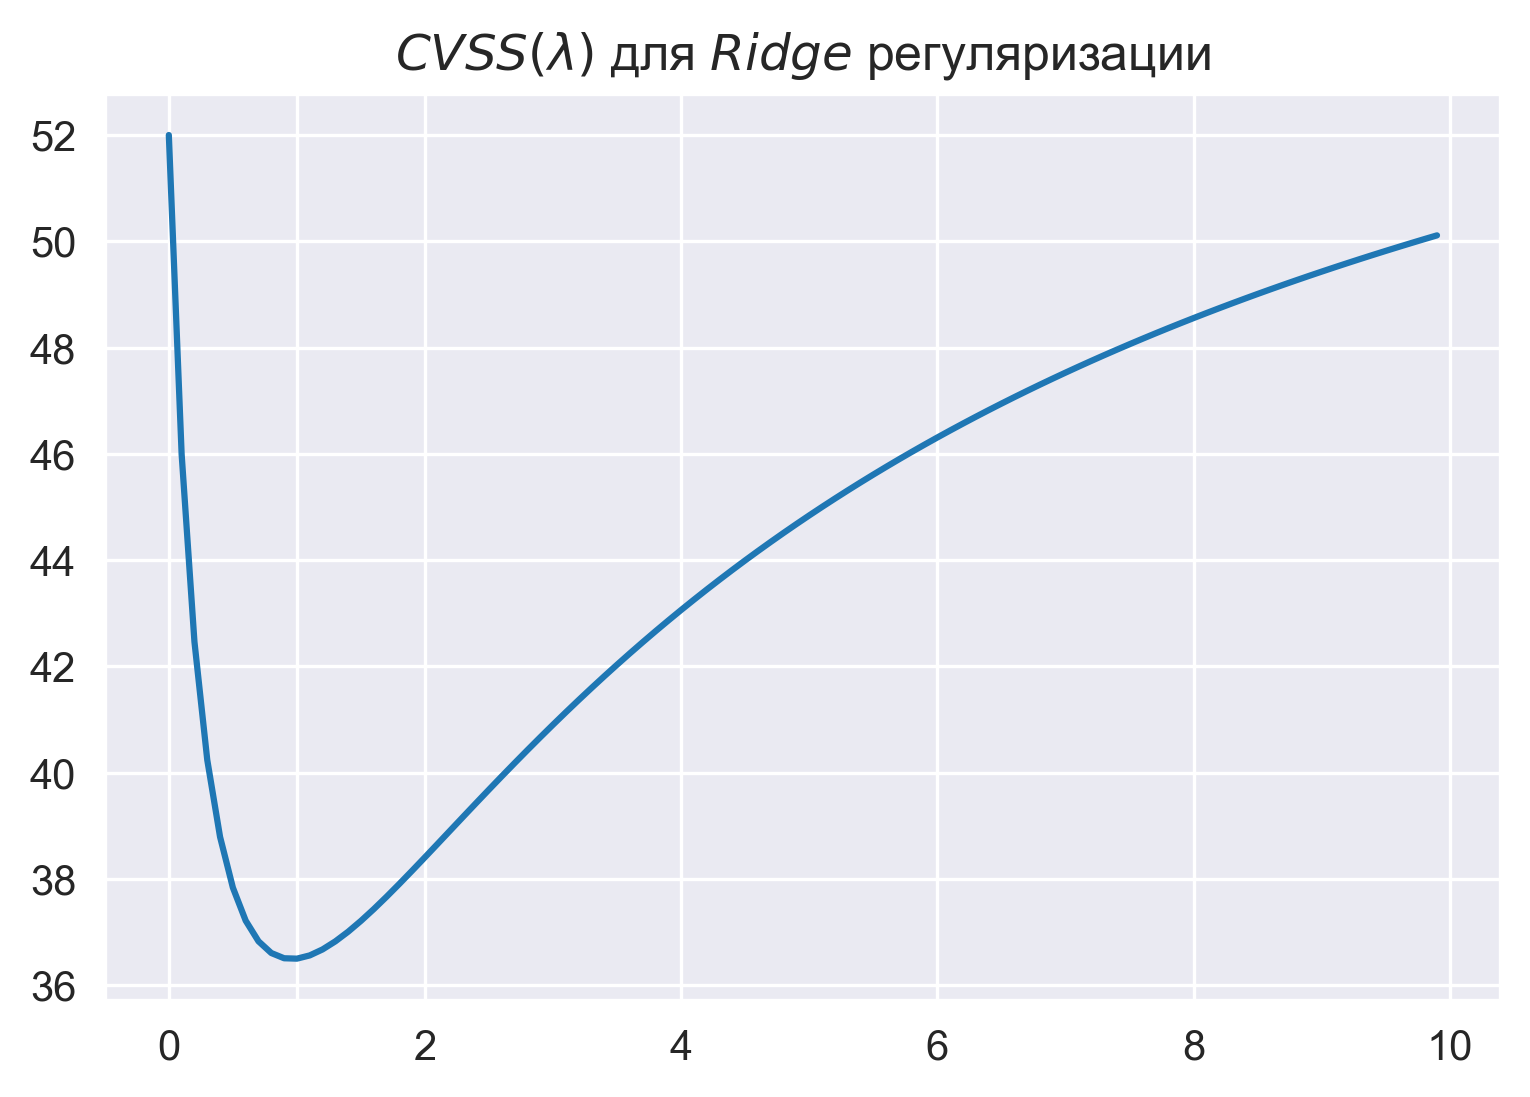

In [6]:
ridge_optimization()

## Lasso регуляризация

In [28]:
def lasso_func(x, t_factors, t_answers, l):
    errors = t_answers - t_factors @ x
    return errors.T @ errors + l * (abs(x[0]) + abs(x[1]))


def calc_lasso_coeff(l):
    return minimize(lasso_func, np.array([0, 0]), args=(factors, answers, l)).x

lambdas = np.arange(0, 10, 0.1)
cvss = []
for _lambda in lambdas:
    cvss_i = []
    for i in range(len(answers)):
        new_factors = np.delete(factors, i, 0)
        new_answers = np.delete(answers, i, 0)
        y = minimize(lasso_func, np.array([0, 0]), args=(new_factors, new_answers, _lambda), method='SLSQP').x
        error = answers[i] - new_factors @ y
        cvss_i.append(error.T @ error)
    cvss.append(np.sum(cvss_i))

In [1]:
lasso_fig, lasso_ax = plt.subplots(dpi=300)
lasso_ax.set_title("$CVSS(\lambda)$ для $Lasso$ регуляризации")
lasso_ax.grid(True, which='both')

lasso_ax.xaxis.set_minor_locator(ticker.FixedLocator([lambdas[cvss.index(min(cvss))]]))
lasso_ax.plot(lambdas, cvss)
print(lambdas[cvss.index(min(cvss))], calc_lasso_coeff(lambdas[cvss.index(min(cvss))]))
plt.show()

NameError: name 'plt' is not defined